In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [23]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir  e:\VS Codes\AICTE Project


In [24]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 900 files belonging to 3 classes.


In [25]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 300 files belonging to 3 classes.


In [27]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [28]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 783ms/step - accuracy: 0.4061 - loss: 1.5783 - val_accuracy: 0.6500 - val_loss: 0.7451
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 689ms/step - accuracy: 0.6587 - loss: 0.7102 - val_accuracy: 0.7133 - val_loss: 0.5347
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.7377 - loss: 0.5775 - val_accuracy: 0.8300 - val_loss: 0.4046
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 722ms/step - accuracy: 0.8568 - loss: 0.3406 - val_accuracy: 0.6333 - val_loss: 0.6899
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 735ms/step - accuracy: 0.7511 - loss: 0.5645 - val_accuracy: 0.8733 - val_loss: 0.2641
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 697ms/step - accuracy: 0.9199 - loss: 0.2095 - val_accuracy: 0.8900 - val_loss: 0.2879
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 753ms/step - accuracy: 0.9191 - loss: 0.2112 - val_accuracy: 0.9067 - val_loss: 0.2271
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 711ms/step - accuracy: 0.9337 - loss: 0.1593 - val_accu

In [31]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.9590 - loss: 0.1409
Training accuracy: 0.9522222280502319


In [32]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9283 - loss: 0.2505
Validation accuracy: 0.9133333563804626


In [33]:
cnn.save('trained_plant_disease_model.keras')

In [34]:
training_history.history

{'accuracy': [0.4555555582046509,
  0.6944444179534912,
  0.7677778005599976,
  0.8333333134651184,
  0.8144444227218628,
  0.9300000071525574,
  0.9266666769981384,
  0.9333333373069763,
  0.9677777886390686,
  0.9711111187934875],
 'loss': [1.2094529867172241,
  0.6423841714859009,
  0.49676111340522766,
  0.42310333251953125,
  0.44300857186317444,
  0.18952475488185883,
  0.19271977245807648,
  0.16489049792289734,
  0.10087194293737411,
  0.08513393998146057],
 'val_accuracy': [0.6499999761581421,
  0.7133333086967468,
  0.8299999833106995,
  0.6333333253860474,
  0.8733333349227905,
  0.8899999856948853,
  0.9066666960716248,
  0.9233333468437195,
  0.8999999761581421,
  0.9133333563804626],
 'val_loss': [0.7451086640357971,
  0.5346606373786926,
  0.4045538902282715,
  0.689900815486908,
  0.26414743065834045,
  0.2879141867160797,
  0.2270526885986328,
  0.16031159460544586,
  0.2403467744588852,
  0.27259042859077454]}

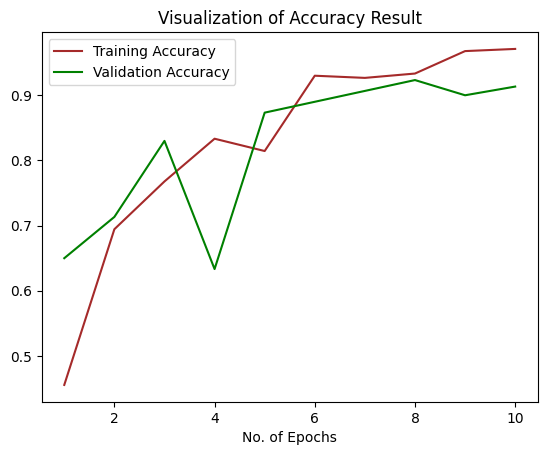

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()